# **Proyecto 3**

In [66]:
#Importando librerías
import sys
import keyword
import operator
from datetime import datetime
import os
import math #algunas operaciones

from scipy import stats
#import pingouin as pg 
#La versión de python de Colab no reconoce esta librería, pero será útil para los gráficos de la prueba de estadística inferencial

import matplotlib.pyplot as plt  #visualization
import seaborn as sb  #visualization

import numpy as np
import pandas as pd

# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
%matplotlib inline

##Análisis Exploratorio de Datos (EDA)

In [67]:
#Leemos el archivo csv y lo almacenamos como DataFrame en una variable para usarlo posteriormente
nutricion = pd.read_csv('https://raw.githubusercontent.com/Nancy-RS/Data-Analytics/proyecto1/Data_Nutricion_grupos%20-%20Hoja1.csv')
nutricion.head(10)

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,"155,7",16.0,"71,2","35,7","29,58",90,98,"0,92","0,58","36,45","45,25",13,27,32,34,A
1,Persona 2,"166,5",16.0,61,"31,8","22,36","80,9","100,5","0,80","0,49","28,79","43,44",5,19,15,22,A
2,Persona 3,"151,3",16.0,"49,1","30,5","21,62",72,86,"0,84","0,48","29,87","34,44",13,18,18,17,A
3,Persona 4,"151,7",16.0,"54,6","32,6","23,12",NaN,"88,4","0,84","0,49","27,87","39,38",5,19,15,18,A
4,Persona 5,"160,3",16.0,58,"30,1","22,26",NaN,"97,9","0,81",NaN,"30,28","40,44",10,19,20,19,A
5,Persona 6,"162,4",16.0,"70,8","33,9","26,12","86,5","106,1","0,82","0,53","31,44","48,54",11,25,18,20,A
6,Persona 7,167,16.0,"47,4","30,5","17,32","66,7","81,5",NaN,"0,40","9,69","42,81","3,5",7,6,6,A
7,Persona 8,"158,7",16.0,"49,3","31,2","18,98","69,3","83,2","0,83","0,44",NaN,"41,24","5,5",12,"10,5","11,5",A
8,Persona 9,"158,2",16.0,91,"37,5","35,52","107,5",116,"0,93","0,68","34,76","59,37",25,21,25,23,A
9,Persona 10,171,16.0,"50,4","30,8","17,54",66,80,"0,83","0,39","12,05","44,33",3,7,"8,5",9,A


In [68]:
#variables que contiene el data frame
nutricion.columns

Index(['Individuo', 'talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO', 'Grupos'],
      dtype='object')

In [69]:
#Información General del Dataframe
nutricion.info()


##EN GENERAL:
#652 registros
#Hay nulos
#Hay variables numéricas registradas como objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    object 
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    object 
 4   circun_cuello                623 non-null    object 
 5   IMC                          640 non-null    object 
 6   circun_cintura               637 non-null    object 
 7   cadera                       647 non-null    object 
 8   ind_cintura_cadera           639 non-null    object 
 9   ind_cintura_estatura         636 non-null    object 
 10  por_grasa_corporal           650 non-null    object 
 11  masa_corporal_magra_kg       648 non-null    object 
 12  pliegue_cutaneo_BICEPS       652 non-null    object 
 13  pliegue_cutaneo_TRIC

In [70]:
#convertimos a números los que sean números 

nutricion['talla'] = nutricion['talla'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['talla'] = pd.to_numeric(nutricion['talla']) #de objerct a float

In [71]:
nutricion['talla'].dtype #comprobamos que ahora es un float

dtype('float64')

In [72]:
#Repetimos con las demás variables que deberían ser float

#peso_kg
nutricion['peso_kg'] = nutricion['peso_kg'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['peso_kg'] = pd.to_numeric(nutricion['peso_kg']) #de objerct a float

#circun_cuello
nutricion['circun_cuello'] = nutricion['circun_cuello'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['circun_cuello'] = pd.to_numeric(nutricion['circun_cuello']) #de objerct a float

#IMC
nutricion['IMC'] = nutricion['IMC'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['IMC'] = pd.to_numeric(nutricion['IMC']) #de objerct a float

#circun_cintura
nutricion['circun_cintura'] = nutricion['circun_cintura'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['circun_cintura'] = pd.to_numeric(nutricion['circun_cintura']) #de objerct a float

#cadera
nutricion['cadera'] = nutricion['cadera'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['cadera'] = pd.to_numeric(nutricion['cadera']) #de objerct a float

#ind_cintura_cadera
nutricion['ind_cintura_cadera'] = nutricion['ind_cintura_cadera'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['ind_cintura_cadera'] = pd.to_numeric(nutricion['ind_cintura_cadera']) #de objerct a float

#ind_cintura_estatura
nutricion['ind_cintura_estatura'] = nutricion['ind_cintura_estatura'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['ind_cintura_estatura'] = pd.to_numeric(nutricion['ind_cintura_estatura']) #de objerct a float

#por_grasa_corporal
nutricion['por_grasa_corporal'] = nutricion['por_grasa_corporal'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['por_grasa_corporal'] = pd.to_numeric(nutricion['por_grasa_corporal']) #de objerct a float

#masa_corporal_magra_kg
nutricion['masa_corporal_magra_kg'] = nutricion['masa_corporal_magra_kg'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['masa_corporal_magra_kg'] = pd.to_numeric(nutricion['masa_corporal_magra_kg']) #de objerct a float

#pliegue_cutaneo_BICEPS
nutricion['pliegue_cutaneo_BICEPS'] = nutricion['pliegue_cutaneo_BICEPS'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['pliegue_cutaneo_BICEPS'] = pd.to_numeric(nutricion['pliegue_cutaneo_BICEPS']) #de objerct a float

#pliegue_cutaneo_TRICEPS
nutricion['pliegue_cutaneo_TRICEPS'] = nutricion['pliegue_cutaneo_TRICEPS'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['pliegue_cutaneo_TRICEPS'] = pd.to_numeric(nutricion['pliegue_cutaneo_TRICEPS']) #de objerct a float

#pliegue_cutaneo_ESCAPULAR
nutricion['pliegue_cutaneo_ESCAPULAR'] = nutricion['pliegue_cutaneo_ESCAPULAR'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['pliegue_cutaneo_ESCAPULAR'] = pd.to_numeric(nutricion['pliegue_cutaneo_ESCAPULAR']) #de objerct a float

#pliegue_cutaneo_SUPRAILIACO
nutricion['pliegue_cutaneo_SUPRAILIACO'] = nutricion['pliegue_cutaneo_SUPRAILIACO'].str.replace(',', '.') #Primero intercambiamos las comas por puntos
nutricion['pliegue_cutaneo_SUPRAILIACO'] = pd.to_numeric(nutricion['pliegue_cutaneo_SUPRAILIACO']) #de objerct a float


In [73]:
#Comprobamos que todos se hayan modificado adecuadamente
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [74]:
#Datos nulos de cada columna
nutricion.isnull().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

In [75]:
#Estadística descriptiva 
nutricion.describe()

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,624.000000,645.000000,629.000000,623.000000,640.000000,637.000000,647.000000,639.000000,636.000000,650.000000,648.000000,652.000000,652.000000,652.000000,652.000000
mean,158.821474,14.753488,56.943561,32.138042,22.426266,74.517425,89.868470,0.831252,0.470708,23.538985,43.379537,9.181748,15.647239,14.383436,14.679448
std,7.477915,1.054276,8.592938,2.156724,3.046842,6.915982,7.210739,0.054821,0.046658,7.860523,6.928954,5.661837,5.692567,5.307465,5.953868
min,135.600000,0.000000,33.900000,24.500000,14.540000,55.000000,69.800000,0.650000,0.360000,4.210000,28.500000,2.000000,5.000000,5.000000,3.000000
25%,153.700000,14.000000,51.000000,30.700000,20.277500,70.000000,85.000000,0.790000,0.440000,15.970000,38.157500,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.175000,73.600000,89.000000,0.830000,0.460000,26.090000,42.355000,8.000000,16.000000,14.000000,15.000000
75%,163.700000,15.000000,61.700000,33.500000,23.912500,78.000000,94.000000,0.870000,0.490000,30.070000,48.122500,12.000000,19.000000,18.000000,19.000000
max,188.600000,17.000000,91.100000,39.200000,36.710000,107.500000,120.800000,1.030000,0.700000,39.450000,71.570000,90.000000,39.000000,35.000000,35.000000


In [76]:
#Borramos los Nulos y obeservamos si se mueven mucho las medidas de tendecia central para poder tomar una decision
nutri = nutricion.dropna()
nutri.describe()

#No se mueven mucho las medidas de tendencia central, a pesar de haber borrado más de 50 datos

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,158.858564,14.666667,56.906998,32.157827,22.396206,74.551013,89.784899,0.831455,0.470166,23.578564,43.359134,9.289134,15.709024,14.440147,14.674033
std,7.537231,1.064928,8.476735,2.187344,2.998572,6.751419,7.056657,0.054697,0.045036,7.809328,7.035822,5.824874,5.609613,5.291556,5.932011
min,141.500000,0.000000,33.900000,24.500000,14.540000,55.000000,69.800000,0.690000,0.360000,4.210000,28.500000,2.000000,5.000000,5.000000,3.000000
25%,153.700000,14.000000,51.000000,30.700000,20.270000,70.000000,85.000000,0.790000,0.440000,16.210000,38.150000,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.090000,73.700000,89.000000,0.830000,0.470000,26.050000,42.320000,8.000000,16.000000,14.000000,14.000000
75%,163.900000,15.000000,61.700000,33.500000,23.905000,78.000000,93.700000,0.870000,0.490000,30.070000,48.145000,13.000000,19.500000,18.000000,19.000000
max,188.600000,17.000000,91.100000,39.200000,35.520000,107.500000,120.800000,1.030000,0.680000,39.450000,71.570000,90.000000,39.000000,35.000000,35.000000


In [77]:
len(nutri.drop_duplicates()) #vemos que los datos no tienen duplicados 

543

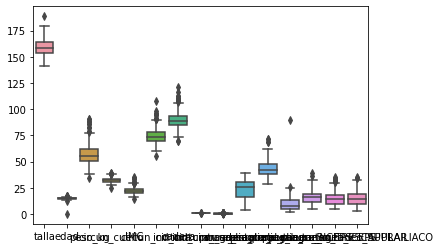

In [78]:
#Graficamos los boxblot generales para ver cómo se comportan las tendencias
sb.boxplot(data=nutri)

#Observamos más detalladamente algunos casos
#Depende de los expertos en el tema y del proyecto decidir si los valores atípicos se eliminan o se conservan

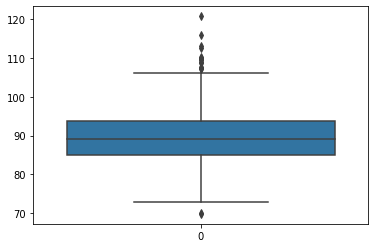

In [79]:
#Hay valores que se salen de los cuartiles pero no están tan alejados de la media
sb.boxplot(data = nutri['cadera'])

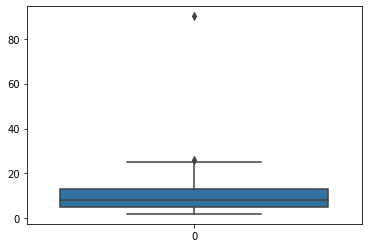

In [80]:
#Vemos que hay un valor atípico muy obvio
sb.boxplot(data = nutri['pliegue_cutaneo_BICEPS'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


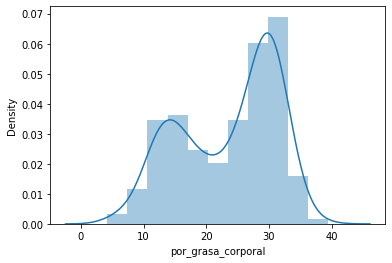

In [81]:
#Graficamos el histograma de alguna variable para ver su comportamiento
sb.distplot(nutri['por_grasa_corporal'])

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
talla,1.000000,0.108679,0.463097,0.188871,-0.159079,0.167312,0.016569,0.209094,-0.333916,-0.518623,0.757096,-0.318121,-0.367821,-0.275508,-0.319493
edad,0.108679,1.000000,0.164115,0.114903,0.153057,0.174149,0.176789,0.026079,0.111948,0.039139,0.131734,-0.025183,0.019869,0.080435,0.064254
peso_kg,0.463097,0.164115,1.000000,0.773789,0.752273,0.796180,0.693929,0.261322,0.527267,0.196734,0.782465,0.181702,0.346717,0.472216,0.405322
circun_cuello,0.188871,0.114903,0.773789,1.000000,0.780298,0.730786,0.507368,0.400956,0.608445,0.103227,0.631640,0.119283,0.288671,0.471092,0.375746
IMC,-0.159079,0.153057,0.752273,0.780298,1.000000,0.782330,0.777837,0.146689,0.824577,0.589355,0.299643,0.424387,0.663098,0.749525,0.684289
circun_cintura,0.167312,0.174149,0.796180,0.730786,0.782330,1.000000,0.702813,0.531849,0.870242,0.334816,0.502631,0.250994,0.425385,0.600895,0.528971
cadera,0.016569,0.176789,0.693929,0.507368,0.777837,0.702813,1.000000,-0.224148,0.656208,0.609273,0.237324,0.372682,0.666058,0.648398,0.639073
ind_cintura_cadera,0.209094,0.026079,0.261322,0.400956,0.146689,0.531849,-0.224148,1.000000,0.409753,-0.271089,0.404954,-0.108513,-0.207364,0.054740,-0.038113
ind_cintura_estatura,-0.333916,0.111948,0.527267,0.608445,0.824577,0.870242,0.656208,0.409753,1.000000,0.567205,0.107641,0.389883,0.580904,0.703881,0.655435
por_grasa_corporal,-0.518623,0.039139,0.196734,0.103227,0.589355,0.334816,0.609273,-0.271089,0.567205,1.000000,-0.449722,0.695318,0.874632,0.753378,0.833379


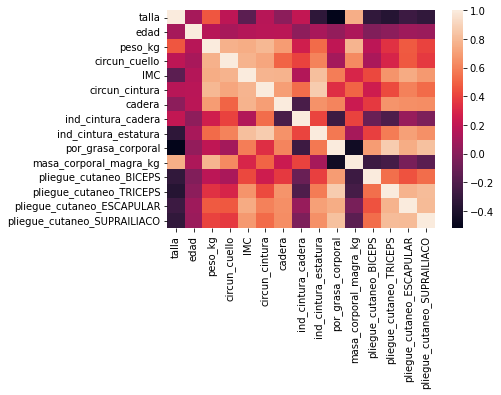

In [82]:
#Correlaciones y mapa de calor
correlaciones= nutri.corr()
sb.heatmap(correlaciones)
correlaciones

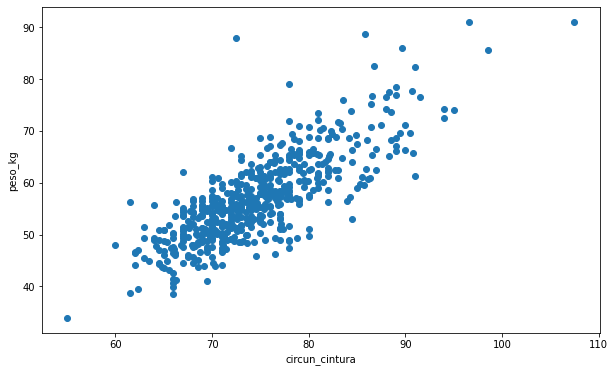

In [83]:
#Gráficos de dispersión

#Escogemos dos variables que hayan tenido una alta correlación
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(nutri['circun_cintura'], nutri['peso_kg'])
ax.set_xlabel('circun_cintura')
ax.set_ylabel('peso_kg')
plt.show()

#El gráfico muestra una tendencia evidente

##Estadística Inferencial (hasta 5 variables)

In [84]:
# Número de observaciones por grupo

nutri.groupby('Grupos').size()

Grupos
A    263
B    280
dtype: int64

In [86]:
import pingouin as pg 

ModuleNotFoundError: ignored

NameError: ignored

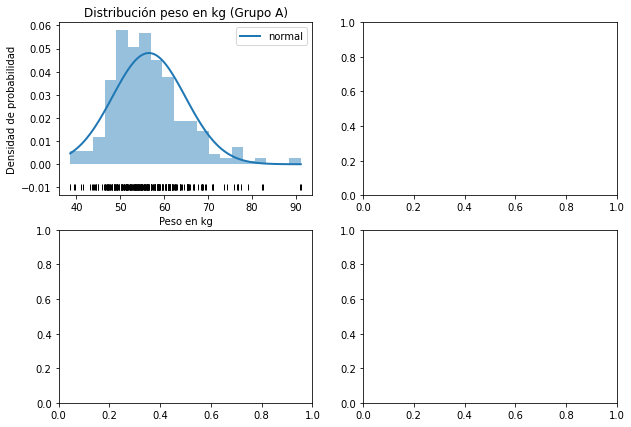

In [85]:
###Prueba t######

# Gráficos de distribución

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_kg_A = nutri.loc[nutri.Grupos == 'A', 'peso_kg']

# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_kg_A)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_kg_A), max(peso_kg_A), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth = 2, label = 'normal')
axs[0, 0].hist(x = peso_kg_A, density = True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(peso_kg_A, np.full_like(peso_kg_A, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución peso en kg (Grupo A)')
axs[0, 0].set_xlabel('Peso en kg')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()


# Gráfico distribución qq-plot
pg.qqplot(peso_smokers, dist='norm', ax=axs[0, 1])

peso_kg_B = nutri.loc[nutri.Grupos == 'B', 'peso_kg']

mu, sigma = stats.norm.fit(peso_kg_B)

x_hat = np.linspace(min(peso_kg_B), max(peso_kg_B), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=peso_kg_B, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(peso_kg_B, np.full_like(peso_kg_B, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución peso en kg (Grupo B)')
axs[1, 0].set_xlabel('Peso en Kg')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(peso_kg_B, dist='norm', ax=axs[1, 1])

plt.tight_layout();

In [ ]:
##La versión de python de Colab no reconoce la librería pingouin

#VIDEO YOUTUBE: https://youtu.be/aX6VBHNN3YE 
